In [4]:
import collections
import seaborn as sns
import numpy as np
import itertools as it
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from  imp import reload
import sys
#sys.path.insert(1, '../mallows_kendall')
#sys.path.insert(1, '../permus_util')
import mallows_kendall as mk
import permutil as pu

# Are the depths ordered with the distances?
Only for distributions clode to the dirac?? we can try to bound the total variation

In [7]:
def oder_distance_depth(n, model_param, model="mm_ken"):
    N = (n*(n-1)/2)
    print("The maximum distance with n =",n, "is",N)
    print("The expected distance of under the uniform distri is", N/2, "\n")
    
    if model == "mm_ken":
        theta = model_param
        phi = mk.theta_to_phi(theta)
        params = phi
        print(f"Mallow model with parameters {params}")
        print("The expected distance of the model is", mk.expected_dist_mm(n,phi=phi))
        print("The expected distance (normalized) of the model is", mk.expected_dist_mm(n,phi=phi)/N, "\n")
        #Note: the expected distace at the uniform
    elif model == "pl":
        if not isinstance(model_param, str):
            model_param_ = model_param
        elif model_param == "peaked":
            model_param_ = np.array([np.exp(n-i) for i in range(n)])
        elif model_param == "disperse":
            model_param_ = np.array([(n-i) for i in range(n)])
        params = model_param_
        print(f"Plackett-Luce model with parameters {params}") 

    P = pu.get_P(n, model=model, params=params)
    res  = []
    for perm in it.permutations(range(n)):
        depth = n*(n-1)/2 - pu.dist_to_sample(perm,P)
        #dist_ = mk.kendall_tau(perm)
        dist_ = mk.distance(perm)
        if model == "mm_ken":
            prob = mk.prob(n, theta, dist_)
        elif model == "pl":
            prob = pu.pl_proba(perm, params)
        res.append([depth, dist_, perm, prob])
        
    df = pd.DataFrame(res,columns=['depth','dist','perm', 'proba'])
    df = df.sort_values('proba', ascending=False)
    a = df.groupby('dist').depth.min()
    b = df.groupby('dist').depth.max()
    print("Are the depths order by distance?", ((a.shift() > b)[1:]).all()) 
    indx_no = list(np.where((a.shift() > b)[1:]==False)[0])
    indx_no = [elem+1 for elem in indx_no]
    print(f"At which Kendall distance d' are the rankings sigma' that DO NOT satisfy the order? {indx_no} \n")

    h = np.nanmin(np.abs(P-1/2))
    P_ = (P-1/2).clip(min=0).flatten()
    P_ = np.unique(list(filter(lambda v: (v==v) and (v>0), P_)))
    s = np.max([np.abs(x - y) for i,x in enumerate(P_) for j,y in enumerate(P_) if i != j])
    print(f"h = {np.round(h,3)} and s = {np.round(s,3)}: the distance property holds for distance d' <= {np.floor(h/s + 1)}")

    plt.style.use('ggplot')
    plt.figure(figsize=(16, 8))
    #plt.subplot(1, 3, 1)
    plt.title('Depth vs Distance', fontsize=25)
    plt.scatter(df['dist'], df['depth'], s=100, alpha=0.3)
    plt.xlabel(f"Kendall distance to the median", fontsize=20)
    plt.ylabel(f"Depth", fontsize=20)
    plt.show()


    plt.figure(figsize=(20, 8))
    plt.subplot(1, 2, 1)
    plt.gca().set_title('General probability distribution', fontsize=20)
    plt.scatter(range(len(df)), df['proba'], s=100, alpha=1)
    plt.xlabel(f"Index of each ranking", fontsize=20)
    plt.ylabel(f"Probability of each ranking", fontsize=20)
    plt.subplot(1, 2, 2)
    plt.gca().set_title('Proba. distrib. as a function of distance', fontsize=20)
    plt.scatter(df['dist'], df['proba'], s=100, alpha=0.3)
    plt.xlabel(f"Kendall distance to the median", fontsize=20)
    plt.ylabel(f"Probability of each ranking", fontsize=20)
    plt.suptitle("Probability distributions of rankings", fontsize=25)
    plt.show()

    plt.figure(figsize=(20, 8))
    pp_upper = list(filter(lambda v: (v==v) and (v>0), np.triu(P).flatten()))
    pp_upper = sorted(pp_upper, reverse=True)
    plt.scatter(range(len(pp_upper)), pp_upper, s=100, alpha=1)
    plt.ylim(0.49,1.01)
    plt.xlabel(f"Indices of pairs (i,j)", fontsize=20)
    plt.ylabel(f"Pairwise probability p_(i,j)", fontsize=20)
    plt.title(f"Pairwise probability distribution", fontsize=25)
    plt.show()

The maximum distance with n = 4 is 6.0
The expected distance of under the uniform distri is 3.0 

Mallow model with parameters 0.9900498337491681
The expected distance of the model is 2.9783338194283715
The expected distance (normalized) of the model is 0.4963889699047286 

Are the depths order by distance? True
At which Kendall distance d' are the rankings sigma' that DO NOT satisfy the order? [] 

h = 0.002 and s = 0.003: the distance property holds for distance d' <= 1.0


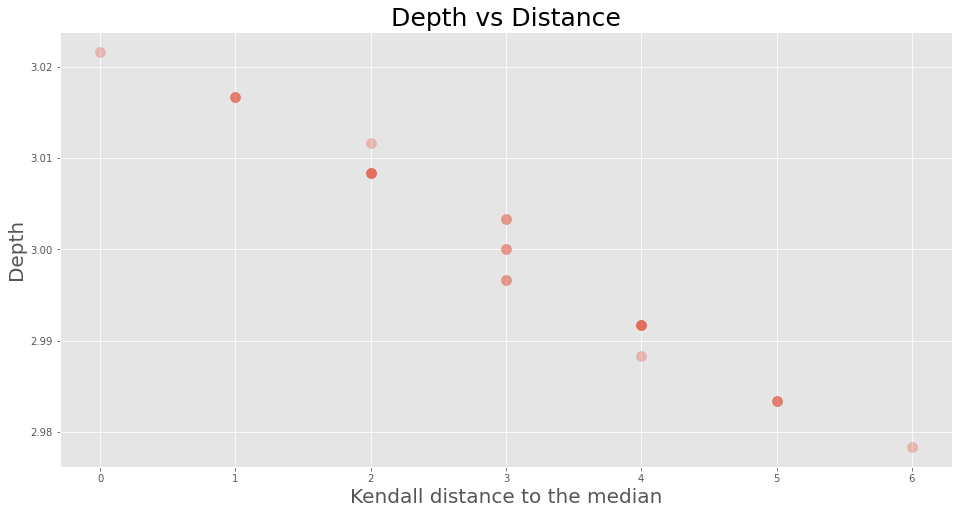

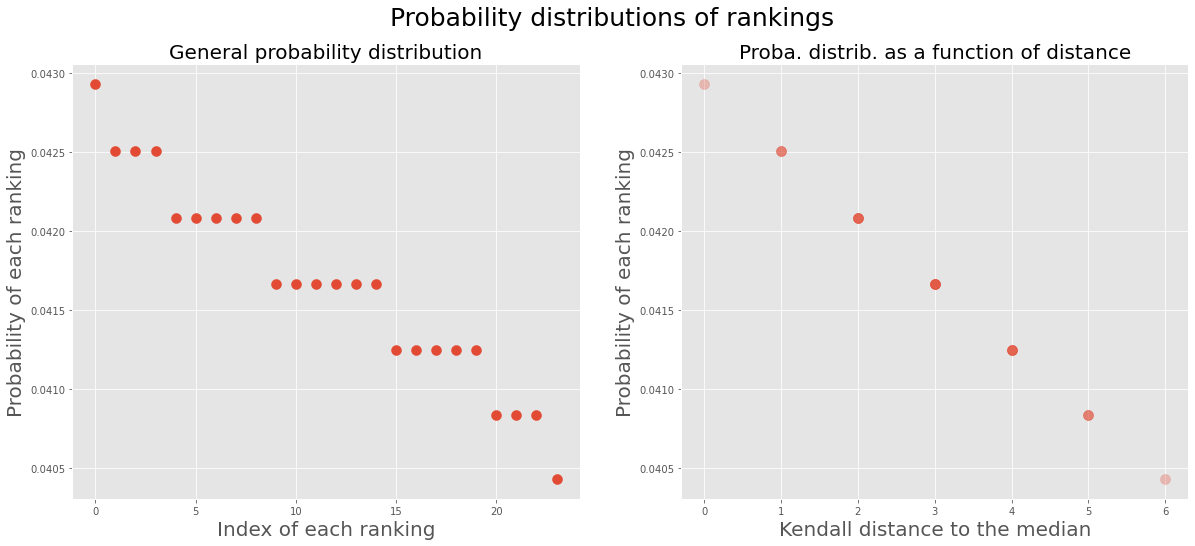

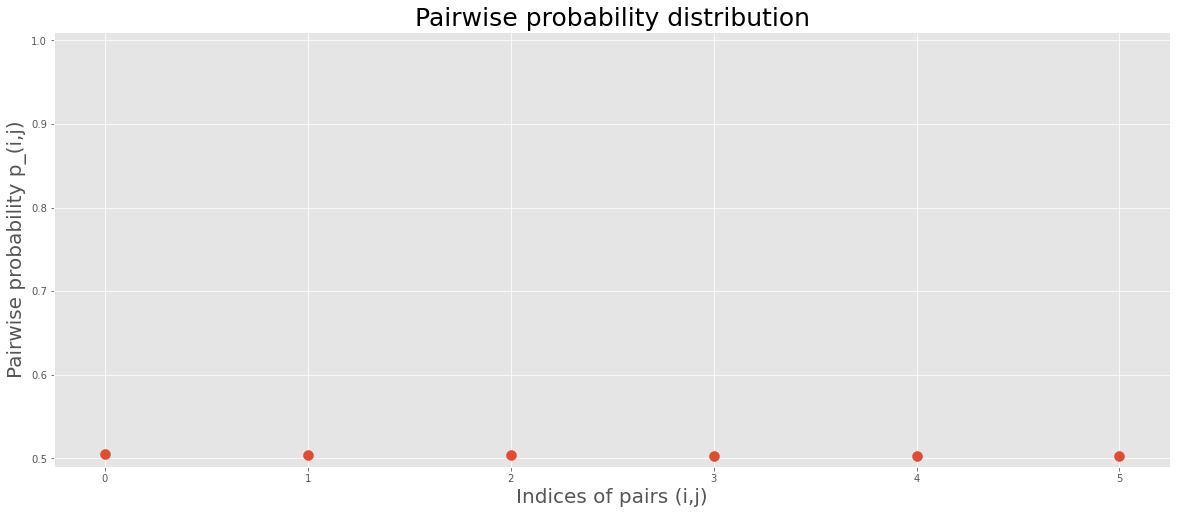

In [12]:
n = 4
# For MM model, param in [0.01, 5] is nice to check.
param = 0.01 #"disperse"
model = "mm_ken" #"pl"

oder_distance_depth(n, param, model)

In [127]:
df

,depth,dist,perm,proba
0,3.429495,0,"(0, 1, 2, 3)",0.072716
1,3.329827,1,"(0, 1, 3, 2)",0.059535
2,3.329827,1,"(0, 2, 1, 3)",0.059535
3,3.164591,2,"(0, 2, 3, 1)",0.048743
4,3.164591,2,"(0, 3, 1, 2)",0.048743
5,3.064923,3,"(0, 3, 2, 1)",0.039907
6,3.329827,1,"(1, 0, 2, 3)",0.059535
7,3.230159,2,"(1, 0, 3, 2)",0.048743
8,3.164591,2,"(1, 2, 0, 3)",0.048743
9,2.935077,3,"(1, 2, 3, 0)",0.039907
